In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('customer_churn_data.csv')

In [4]:
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [6]:
#df.isna().sum().sum()
df.isna().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [7]:
df["InternetService"] = df["InternetService"].fillna("")

In [8]:
df.isna().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,44.674000,18.97300,74.391290,1404.364060
std,288.819436,9.797741,18.89257,25.712083,1571.755048
min,1.000000,12.000000,0.00000,30.000000,0.000000
25%,250.750000,38.000000,5.00000,52.357500,345.217500
50%,500.500000,45.000000,13.00000,74.060000,872.870000
75%,750.250000,51.000000,26.00000,96.102500,1900.175000
max,1000.000000,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_col_data = df.select_dtypes(include = ["number"])

In [12]:
numeric_col_data.corr()

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges
CustomerID,1.000000,0.036730,-0.018585,-0.030504,-0.027490
Age,0.036730,1.000000,0.000472,0.006362,-0.001896
Tenure,-0.018585,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,-0.030504,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.027490,-0.001896,0.894868,0.304893,1.000000


In [13]:
import matplotlib.pyplot as plt

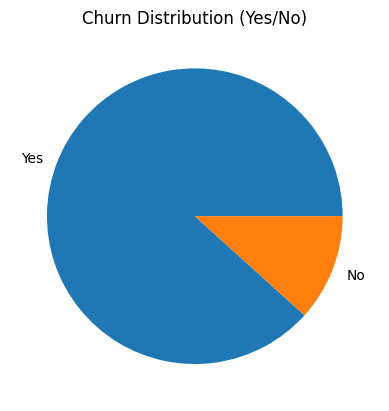

In [14]:
df["Churn"].value_counts().plot(kind="pie")
plt.title("Churn Distribution (Yes/No)")
plt.ylabel("")
plt.show()

In [15]:
df.groupby("Churn")["MonthlyCharges"].mean()

Churn
No     62.54641
Yes    75.96077
Name: MonthlyCharges, dtype: float64

At the lower terms we can see that the monthly charge average decreases

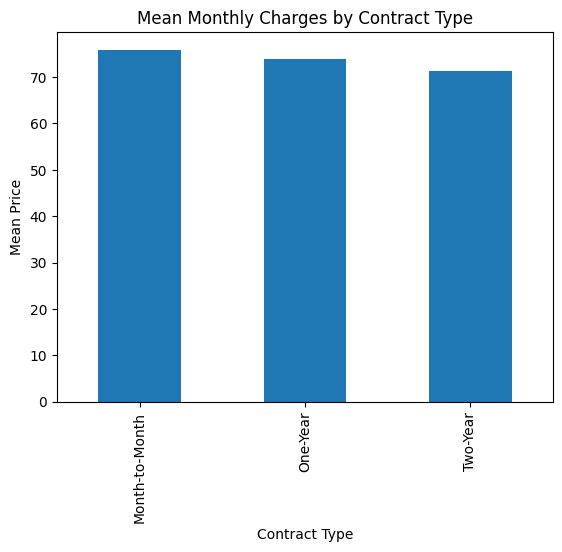

In [16]:
df.groupby("ContractType")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Price")
plt.xlabel("Contract Type")
plt.title("Mean Monthly Charges by Contract Type")
plt.show()

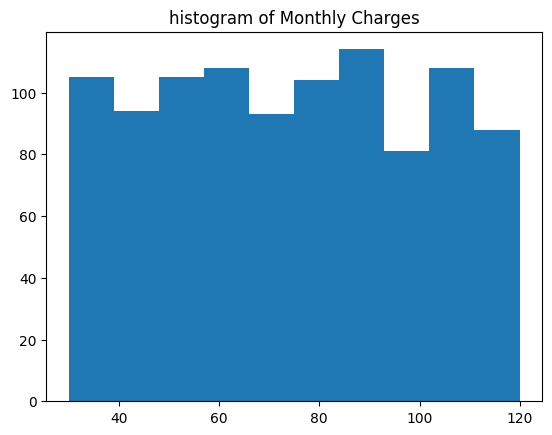

In [17]:
plt.hist(df["MonthlyCharges"])
plt.title("histogram of Monthly Charges")
plt.show()

In [18]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'MonthlyCharges',
       'ContractType', 'InternetService', 'TotalCharges', 'TechSupport',
       'Churn'],
      dtype='object')

In [19]:
y = df[["Churn"]]
X = df[["Age", "Gender", "Tenure", "MonthlyCharges"]]

In [20]:
X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)

C:\Users\utkar\AppData\Local\Temp\ipykernel_26100\2388402656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Gender"] = X["Gender"].apply(lambda x: 1 if x == "Female" else 0)


In [22]:
X.head()

,Age,Gender,Tenure,MonthlyCharges
0,49,0,4,88.35
1,43,0,0,36.67
2,51,1,2,63.79
3,60,1,8,102.34
4,42,0,32,69.01


In [23]:
y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


C:\Users\utkar\AppData\Local\Temp\ipykernel_26100\2818957861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["Churn"] = y["Churn"].apply(lambda x: 1 if x == "Yes" else 0)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)

In [27]:
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [28]:
X_test = scaler.transform(X_test)

In [29]:
from sklearn.metrics import accuracy_score
def modelperformance(predictions):
  print("Accuracy is {}".format(accuracy_score(y_test, predictions)))

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [31]:
import warnings
warnings.filterwarnings("ignore")

In [32]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [33]:
log_model.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [34]:
y_pred = log_model.predict(X_test)
modelperformance(y_pred)

Accuracy is 0.865


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
param_grid = {
  "n_neighbors": [3,5,7,9],
  "weights": ["uniform", "distance"],
}

In [37]:
gridkn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
gridkn.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [38]:
gridkn.best_params_

{'n_neighbors': 9, 'weights': 'uniform'}

In [39]:
y_pred = gridkn.predict(X_test)
modelperformance(y_pred)

Accuracy is 0.86


In [40]:
from sklearn.svm import SVC
svm_model = SVC()

In [41]:
param_grid = {
  "C": [0.01, 0.1, 0.5, 1],
  "kernel": ["linear", "rbf", "poly"],
}

In [42]:
gridsvc = GridSearchCV(svm_model, param_grid, cv=5)
gridsvc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [43]:
gridsvc.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [44]:
y_pred = gridsvc.predict(X_test)
modelperformance(y_pred)

Accuracy is 0.87


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
param_grid = {
  "criterion": ["gini", "entropy"],
  "splitter": ["best", "random"],
  "max_depth": [None, 10, 20, 30],
  "min_samples_split": [2, 5, 10],
  "min_samples_leaf": [1, 2, 4],
}

In [47]:
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_tree.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [48]:
grid_tree.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'splitter': 'best'}

In [49]:
y_pred = grid_tree.predict(X_test)
modelperformance(y_pred)

Accuracy is 0.835


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [51]:
param_grid = {
  "n_estimators": [32, 64, 120, 256],
  "max_features": [2, 3, 4],
  "bootstrap": [True, False],
}

In [52]:
grid_rfc = GridSearchCV(rf_model, param_grid, cv=5)
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_features': [2, 3, 4],
                         'n_estimators': [32, 64, 120, 256]})

In [53]:
grid_rfc.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 120}

In [54]:
grid_rfc.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [55]:
y_pred = grid_rfc.predict(X_test)
modelperformance(y_pred)

Accuracy is 0.86


In [56]:
best_model = gridsvc.best_estimator_

In [57]:
joblib.dump(best_model, "customer_churn_model.pkl")

['customer_churn_model.pkl']

In [58]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'MonthlyCharges'], dtype='object')